# Scratchpad

A simple Python Notebook's scratchpad to test the package functionality

### *) Import libraries and dependencies

In [185]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import datetime as dt
import requests
import json
import os

### 1) Requests API access

In [186]:
# Load API Key and Secret for Authentication

load_dotenv() # take environment variables from .env

key = os.getenv('YOUR_CONSUMER_KEY')
secret = os.getenv('YOUR_CONSUMER_SECRET')

In [187]:
# Load tet-url
url = f'https://app.ticketmaster.com/discovery/v2/events.json?apikey={key}&size=200&page=1&sort=date,asc'

In [188]:
# Request event
r = requests.get(url)

In [189]:
# Checking request status
r.status_code

200

In [190]:
# Storing JSON
event = r.json()

# Checking type
print(type(event))

# Checking JSON keys
print(event['_embedded'].keys())

<class 'dict'>
dict_keys(['events'])


In [191]:
print(event['page'])

{'size': 200, 'totalElements': 168382, 'totalPages': 842, 'number': 1}


In [192]:
# Parsing JSON to csv
event_df = pd.DataFrame(event['_embedded']['events'])

event_df.head()

,name,type,id,test,url,locale,images,sales,dates,classifications,...,ageRestrictions,ticketing,_links,_embedded,doorsTimes,ticketLimit,description,place,products,outlets
0,VIP - Christmas Burns Red 2022,event,vvG1FZ9fh01bLc,False,https://www.ticketmaster.com/vip-christmas-bur...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
1,Meet & Greet VIP - Christmas Burns Red 2022,event,vvG1FZ9fhEGIIG,False,https://www.ticketmaster.com/meet-greet-vip-ch...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
2,2-DAY PASS - Christmas Burns Red 2022,event,vvG1FZ9fhOpFkc,False,https://www.ticketmaster.com/2day-pass-christm...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
3,The International Beatles On The Beach Festiva...,event,vvG1VZ98TZ_GZH,False,https://www.ticketmaster.com/the-international...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-08-30T12:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1VZ...,{'venues': [{'name': 'Old School Square Pavili...,"{'localDate': '2022-12-17', 'localTime': '17:0...",NaN,NaN,NaN,NaN,NaN
4,Tours: Truist Park,event,vvG1zZ98pYgKkm,False,https://www.ticketmaster.com/tours-truist-park...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-08-11T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1zZ...,"{'venues': [{'name': 'Truist Park', 'type': 'v...",NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
event_df.columns

Index(['name', 'type', 'id', 'test', 'url', 'locale', 'images', 'sales',
       'dates', 'classifications', 'promoter', 'promoters', 'info',
       'pleaseNote', 'priceRanges', 'seatmap', 'accessibility',
       'ageRestrictions', 'ticketing', '_links', '_embedded', 'doorsTimes',
       'ticketLimit', 'description', 'place', 'products', 'outlets'],
      dtype='object')

In [194]:
event_df

,name,type,id,test,url,locale,images,sales,dates,classifications,...,ageRestrictions,ticketing,_links,_embedded,doorsTimes,ticketLimit,description,place,products,outlets
0,VIP - Christmas Burns Red 2022,event,vvG1FZ9fh01bLc,False,https://www.ticketmaster.com/vip-christmas-bur...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
1,Meet & Greet VIP - Christmas Burns Red 2022,event,vvG1FZ9fhEGIIG,False,https://www.ticketmaster.com/meet-greet-vip-ch...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
2,2-DAY PASS - Christmas Burns Red 2022,event,vvG1FZ9fhOpFkc,False,https://www.ticketmaster.com/2day-pass-christm...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
3,The International Beatles On The Beach Festiva...,event,vvG1VZ98TZ_GZH,False,https://www.ticketmaster.com/the-international...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-08-30T12:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1VZ...,{'venues': [{'name': 'Old School Square Pavili...,"{'localDate': '2022-12-17', 'localTime': '17:0...",NaN,NaN,NaN,NaN,NaN
4,Tours: Truist Park,event,vvG1zZ98pYgKkm,False,https://www.ticketmaster.com/tours-truist-park...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-08-11T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1zZ...,"{'venues': [{'name': 'Truist Park', 'type': 'v...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Altered Images,event,G5dFZ95E1NxGC,False,https://www.ticketweb.uk/event/altered-images-...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-06-01T08:00...,"{'start': {'localDate': '2022-12-16', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/G5dFZ9...,"{'venues': [{'name': 'Saint Luke's', 'type': '...",NaN,NaN,NaN,NaN,NaN,NaN
196,Brother Strut 'attic Sessions' - Restaurant Ta...,event,G5dFZ98E76o5f,False,https://www.ticketweb.uk/event/brother-strut-a...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-08-11T09:00...,"{'start': {'localDate': '2022-12-16', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/G5dFZ9...,"{'venues': [{'name': 'Jazz Cafe', 'type': 'ven...",NaN,NaN,NaN,NaN,NaN,NaN
197,Brother Strut 'attic Sessions',event,G5dFZ98EdZsaO,False,https://www.ticketweb.uk/

In [195]:
event_df

,name,type,id,test,url,locale,images,sales,dates,classifications,...,ageRestrictions,ticketing,_links,_embedded,doorsTimes,ticketLimit,description,place,products,outlets
0,VIP - Christmas Burns Red 2022,event,vvG1FZ9fh01bLc,False,https://www.ticketmaster.com/vip-christmas-bur...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
1,Meet & Greet VIP - Christmas Burns Red 2022,event,vvG1FZ9fhEGIIG,False,https://www.ticketmaster.com/meet-greet-vip-ch...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
2,2-DAY PASS - Christmas Burns Red 2022,event,vvG1FZ9fhOpFkc,False,https://www.ticketmaster.com/2day-pass-christm...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-10-07T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1FZ...,{'venues': [{'name': 'Freedom Hall / Lancaster...,NaN,NaN,NaN,NaN,NaN,NaN
3,The International Beatles On The Beach Festiva...,event,vvG1VZ98TZ_GZH,False,https://www.ticketmaster.com/the-international...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-08-30T12:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1VZ...,{'venues': [{'name': 'Old School Square Pavili...,"{'localDate': '2022-12-17', 'localTime': '17:0...",NaN,NaN,NaN,NaN,NaN
4,Tours: Truist Park,event,vvG1zZ98pYgKkm,False,https://www.ticketmaster.com/tours-truist-park...,en-us,"[{'ratio': '3_2', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-08-11T14:00...,"{'start': {'localDate': '2022-12-16', 'dateTBD...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/vvG1zZ...,"{'venues': [{'name': 'Truist Park', 'type': 'v...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Altered Images,event,G5dFZ95E1NxGC,False,https://www.ticketweb.uk/event/altered-images-...,en-us,"[{'ratio': '4_3', 'url': 'https://s1.ticketm.n...",{'public': {'startDateTime': '2022-06-01T08:00...,"{'start': {'localDate': '2022-12-16', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/G5dFZ9...,"{'venues': [{'name': 'Saint Luke's', 'type': '...",NaN,NaN,NaN,NaN,NaN,NaN
196,Brother Strut 'attic Sessions' - Restaurant Ta...,event,G5dFZ98E76o5f,False,https://www.ticketweb.uk/event/brother-strut-a...,en-us,"[{'ratio': '16_9', 'url': 'https://s1.ticketm....",{'public': {'startDateTime': '2022-08-11T09:00...,"{'start': {'localDate': '2022-12-16', 'localTi...","[{'primary': True, 'segment': {'id': 'KZFzniwn...",...,{'legalAgeEnforced': False},{'safeTix': {'enabled': False}},{'self': {'href': '/discovery/v2/events/G5dFZ9...,"{'venues': [{'name': 'Jazz Cafe', 'type': 'ven...",NaN,NaN,NaN,NaN,NaN,NaN
197,Brother Strut 'attic Sessions',event,G5dFZ98EdZsaO,False,https://www.ticketweb.uk/

In [196]:
# Unpacking price type, currency, price_min, price_max, city, lon-lat, genre, and segment
event_df['price'] = event_df.priceRanges.dropna().apply(pd.Series)[0]
event_df[['price_type','currency','price_min','price_max']] = event_df.price.dropna().apply(pd.Series)
event_df['city'] = event_df.place.dropna().apply(pd.Series).city.apply(pd.Series)
event_df[['lon','lat']] = event_df.place.dropna().apply(pd.Series).location.apply(pd.Series)
event_df['genre'] = event_df.classifications.apply(pd.Series)[0].apply(pd.Series).genre.apply(pd.Series)['name']
event_df['segment'] = event_df.classifications.apply(pd.Series)[0].apply(pd.Series).segment.apply(pd.Series)['name']

# Getting startdate and enddate of sales
event_df['startdate'] = None
event_df['enddate'] = None
for x in range(len(event_df)):
    event_df['startdate'][x] = event_df.sales[x].get('public').get('startDateTime')
    event_df['enddate'][x] = event_df.sales[x].get('public').get('endDateTime')

/var/folders/lm/4m76p6md5yn5mmc11llt8hvw0000gn/T/ipykernel_26123/2585951540.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['startdate'][x] = event_df.sales[x].get('public').get('startDateTime')
/var/folders/lm/4m76p6md5yn5mmc11llt8hvw0000gn/T/ipykernel_26123/2585951540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['enddate'][x] = event_df.sales[x].get('public').get('endDateTime')


<AxesSubplot: ylabel='Frequency'>

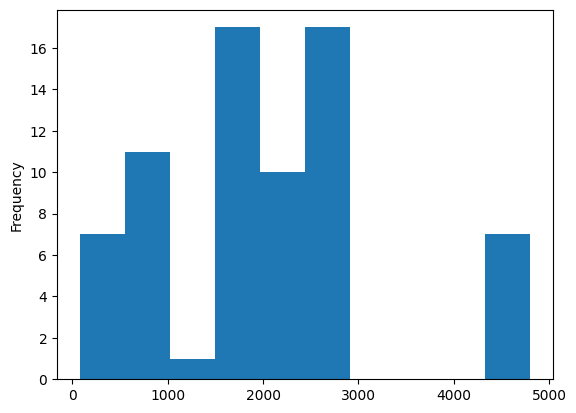

In [198]:
# Take description into wordcloud
event_df.description.dropna().str.len().plot(kind='hist')

<AxesSubplot: >

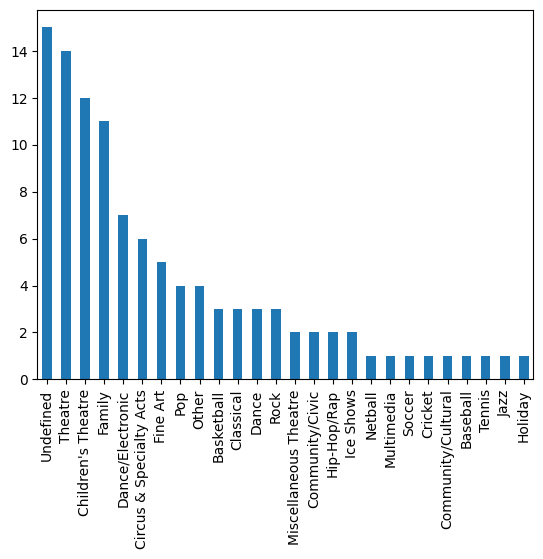

In [14]:
event_df.genre.value_counts().plot(kind='bar')

<AxesSubplot: >

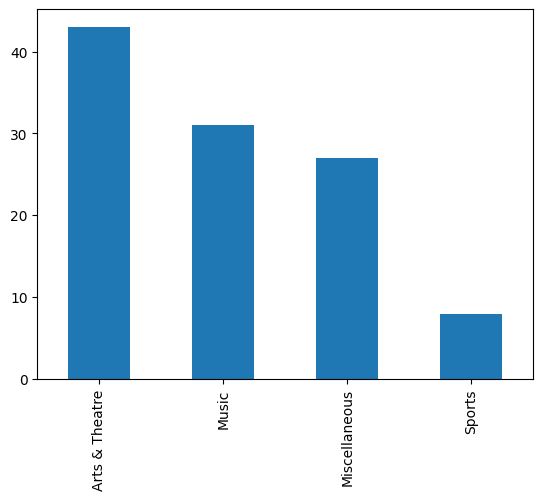

In [24]:
event_df.segment.value_counts().plot(kind='bar')

array([<AxesSubplot: ylabel='percent'>], dtype=object)

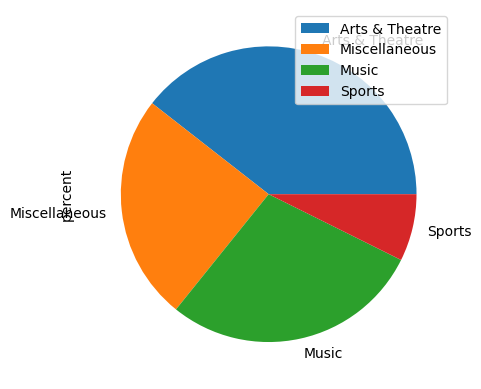

In [41]:
pd.crosstab(event_df['segment'],columns='percent', normalize=True).plot(kind='pie', subplots=True)

In [32]:
event_df.price_min.describe()

count     55.000000
mean      69.361273
std      133.999680
min        0.000000
25%       17.250000
50%       28.900000
75%       50.235000
max      853.000000
Name: price_min, dtype: float64

In [33]:
event_df.price_max.describe()

count      55.000000
mean      124.159636
std       225.994079
min        13.500000
25%        25.250000
50%        40.240000
75%       134.185000
max      1284.000000
Name: price_max, dtype: float64

In [205]:
def pyticket_stats(keyword,apikey,start_date=dt.datetime.today() - dt.timedelta(30),sort='date,asc'):
    """
    This is an extension of previous function. It generates the visualization for the same inputs
    """
     # Reformat arguments
    key = apikey

    # Date adjustment, standardized as API format
    start_date = str(start_date.date()) + 'T00:00:00Z'

    keywordx = str(keyword.replace(' ', '%20'))

    # Generate customize URL
    url = f'https://app.ticketmaster.com/discovery/v2/events?apikey={key}&keyword={keywordx}&locale=*&startDateTime={start_date}&sort={sort}&size=200'

    # Requesting by query
    r = requests.get(url)
    stats = r.status_code

    # Storing JSON
    event = r.json()

    # Parsing JSON to csv
    event_df = pd.DataFrame(event['_embedded']['events'])

    # Cleaning Dataset
    ## Unpacking price type, currency, price_min, price_max, city, lon-lat, genre, and segment
    event_df['price'] = event_df.priceRanges.dropna().apply(pd.Series)[0]
    event_df[['price_type','currency','price_min','price_max']] = event_df.price.dropna().apply(pd.Series)
    event_df['genre'] = event_df.classifications.apply(pd.Series)[0].apply(pd.Series).genre.apply(pd.Series)['name']
    event_df['segment'] = event_df.classifications.apply(pd.Series)[0].apply(pd.Series).segment.apply(pd.Series)['name']

    ## Getting startdate and enddate of sales
    event_df['startdate'] = None
    event_df['enddate'] = None
    for x in range(len(event_df)):
        event_df['startdate'][x] = event_df.sales[x].get('public').get('startDateTime')
        event_df['enddate'][x] = event_df.sales[x].get('public').get('endDateTime')
    
    print('The request status is: {stats}')

    # Return summary stats
    event_df.genre.value_counts().plot(kind='bar') # frequency of genre
    pd.crosstab(event_df['segment'],columns='percent', normalize=True).plot(kind='pie', subplots=True) # pie chart of segment

The request status is: {stats}


/var/folders/lm/4m76p6md5yn5mmc11llt8hvw0000gn/T/ipykernel_26123/1639002505.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['startdate'][x] = event_df.sales[x].get('public').get('startDateTime')
/var/folders/lm/4m76p6md5yn5mmc11llt8hvw0000gn/T/ipykernel_26123/1639002505.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_df['enddate'][x] = event_df.sales[x].get('public').get('endDateTime')


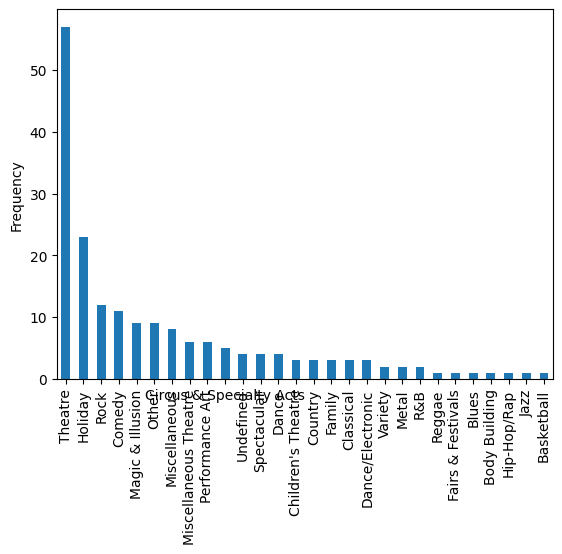

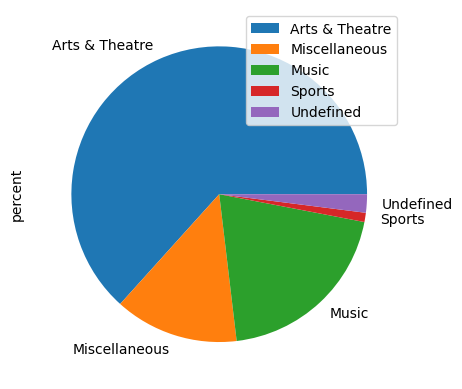

In [204]:
pyticket_stats('Theater',apikey=key)

In [175]:
dataset.columns

Index(['name', 'type', 'id', 'test', 'url', 'locale', 'images', 'sales',
       'dates', 'classifications', 'accessibility', 'ageRestrictions',
       'ticketing', '_links', '_embedded', 'promoter', 'promoters',
       'priceRanges', 'seatmap', 'outlets', 'description', 'pleaseNote',
       'info', 'doorsTimes', 'ticketLimit', 'products', 'place', 'price',
       'price_type', 'currency', 'price_min', 'price_max', 'genre', 'segment',
       'startdate', 'enddate'],
      dtype='object')

In [112]:
url = 'https://app.ticketmaster.com/discovery/v2/events?apikey=7dnpCQo3XiI8dG8TXVpycj6qbI2Ovagn&keyword=phantom%20of%20the%20opera&locale=*&startDateTime=2022-11-16T00:00:00Z&endDateTime=2022-12-16T00:00:00Z&sort=date,asc&countryCode=US&size=200'

In [115]:
url = 'https://app.ticketmaster.com/discovery/v2/events?apikey=7dnpCQo3XiI8dG8TXVpycj6qbI2Ovagn&keyword=phantom%20of%20the%20opera&locale=*&startDateTime=2022-12-01T00:00:00Z&endDateTime=2022-12-31T00:00:00Z&sort=date,asc&countryCode=US'

In [116]:
r = requests.get(url)

r.json()

{'_embedded': {'events': [{'name': 'Phantom Of The Opera',
    'type': 'event',
    'id': 'Z7r9jZ1Ados7Z',
    'test': False,
    'url': 'https://www.ticketmaster.com/event/Z7r9jZ1Ados7Z',
    'locale': 'en-us',
    'images': [{'ratio': '3_2',
      'url': 'https://s1.ticketm.net/dam/c/07d/fda8c807-42eb-4b81-9f16-f3a8367e107d_106371_RETINA_PORTRAIT_3_2.jpg',
      'width': 640,
      'height': 427,
      'fallback': True},
     {'ratio': '3_2',
      'url': 'https://s1.ticketm.net/dam/c/07d/fda8c807-42eb-4b81-9f16-f3a8367e107d_106371_TABLET_LANDSCAPE_3_2.jpg',
      'width': 1024,
      'height': 683,
      'fallback': True},
     {'ratio': '16_9',
      'url': 'https://s1.ticketm.net/dam/c/07d/fda8c807-42eb-4b81-9f16-f3a8367e107d_106371_TABLET_LANDSCAPE_16_9.jpg',
      'width': 1024,
      'height': 576,
      'fallback': True},
     {'ratio': '16_9',
      'url': 'https://s1.ticketm.net/dam/c/07d/fda8c807-42eb-4b81-9f16-f3a8367e107d_106371_RETINA_LANDSCAPE_16_9.jpg',
      'width': 

In [114]:
r.json().keys()

dict_keys(['_links', 'page'])

In [107]:
r.json()

NameError: name 'r' is not defined

### TO DO:

1. Bikin heatmap frekuensi
2. Bikin heatmap demand/supply ratio
3. Bikin trendline supply-demand frequency
4. Bikin trendline supply-demand ratio
5. Bikin wordcloud (description, title)
6. Average price trendline by genre
7. Translate into function
8. Python build package 